## What is the Forbenius Norm? 



Frobenius norm:
$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

In [1]:
import torch
from torch import tensor 

In [2]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [3]:
(m*m).sum().sqrt()

tensor(16.8819)

## What is Variance? 
For a set of data points it is the average of how far each data point is away from the mean. 

In [3]:
import torch 
t = torch.tensor([1.,2.,4.,18])
m = t.mean(); m 

tensor(6.2500)

In [6]:
(t-m).mean() #WRONG:  Positives and Negs canceling each other out 

tensor(0.)

In [9]:
(t-m).pow(2).mean() # Soln1 Square everything to avoid Canceling
# Called Variance Now 

tensor(47.1875)

But the first of these is now a totally different scale, since we squared. So let's undo that at the end.

In [10]:
(t-m).pow(2).mean().sqrt() # Unsquaring Now: Called std()

tensor(6.8693)

In [11]:
(t-m).abs().mean() # Mean Absolute Deviation . Soln 2. Take abs 

tensor(5.8750)

### Name one con of std() over Mean Absolute Deviation? 

Because of 18 (an outlier) in our dataset, the square of 18 increases the sum by a lot. Thus, STD() is quite suseptible to outliers. 

#### Note
They're still different. Why?

Note that we have one outlier (`18`). In the version where we square everything, it makes that much bigger than everything else.

`(t-m).pow(2).mean()` is refered to as **variance**. It's a measure of how spread out the data is, and is particularly sensitive to outliers.

When we take the sqrt of the variance, we get the **standard deviation**. Since it's on the same kind of scale as the original data, it's generally more interpretable. However, since `sqrt(1)==1`, it doesn't much matter which we use when talking about *unit variance* for initializing neural nets.

`(t-m).abs().mean()` is referred to as the **mean absolute deviation**. It isn't used nearly as much as it deserves to be, because mathematicians don't like how awkward it is to work with. But that shouldn't stop us, because we have computers and stuff.

Here's a useful thing to note about variance:

### What's the alternate version (formula) of the variance? 

In [13]:
t = torch.tensor([1.,2.,4.,18])
m = t.mean()
(t-m).pow(2).mean(), (t*t).mean() - (m*m)

(tensor(47.1875), tensor(47.1875))

You can see why these are equal if you want to work thru the algebra. Or not.

But, what's important here is that the latter is generally much easier to work with. In particular, you only have to track two things: the sum of the data, and the sum of squares of the data. Whereas in the first form you actually have to go thru all the data twice (once to calculate the mean, once to calculate the differences).

Let's go steal the LaTeX from [Wikipedia](https://en.wikipedia.org/wiki/Variance):

$$\operatorname{E}\left[X^2 \right] - \operatorname{E}[X]^2$$

## Variance of a Dot Product? 
if I have: 
$$ Y = a.b $$ 

Define Var of Y in terms of Var of a and b

## Covariance and correlation

Here's how Wikipedia defines covariance:

$$\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}$$

In [17]:
import torch
import matplotlib.pyplot as plt

In [18]:
t = torch.tensor([1.,2.,4.,18])

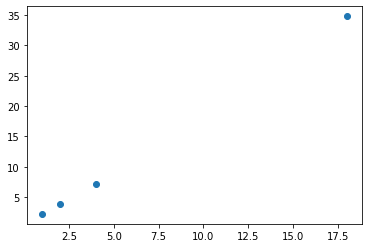

In [19]:
# `u` is twice `t`, plus a bit of randomness
u = t*2
u *= torch.randn_like(t)/10+0.95

plt.scatter(t, u);

In [21]:
prod = (t-t.mean())*(u-u.mean()); prod

tensor([ 51.3526,  34.7343,  10.9100, 267.9366])

In [22]:
prod.mean()

tensor(91.2334)

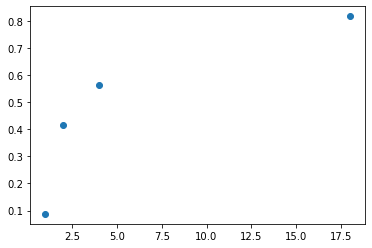

In [23]:
v = torch.randn_like(t)
plt.scatter(t, v);

In [24]:
((t-t.mean())*(v-v.mean())).mean()

tensor(1.5255)

It's a measure of how lined up two sets of variables are. Higher the cov higher the lined up ness. 

> In probability theory and statistics, covariance is a measure of the joint variability of two random variables.[1] **If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive**.[2] In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (that is, the variables tend to show opposite behavior), the covariance is negative. The sign of the covariance therefore shows the **tendency in the linear relationship between the variables** 

<img src="images/covariance.png" alt="Drawing" style="width: 100px;"/>

## What is the alternate representation of cov

It's generally more conveniently defined like so:

$$\operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right]$$

In [25]:
cov = (t*v).mean() - t.mean()*v.mean(); cov

tensor(1.5255)

## Explain how Covariance and Variance are the Same thing. 

Substitute Y with X in convariance 

## What is Correlation? Given Covariance and Variance can you now derive a normalized version of covariance, a ratio to show the relationship between two random variables


Normalized Covariance 
$$\rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}$$

### What is the Correlation between X and X? 
1. 

## Most efficient to Calculate Softmax via code? 
Best way to calculate softmax is to calculate logsoftmax instead. You will be using CrossEntropyLoss which is $$ -\sum x\, \log p(x) $$
So it is better to compute the log before hand as computationally it is easier to compute the `logsumexp`

In [36]:
def log_softmax(x): return x - x.logsumexp(-1,True)
def softmax(x): return x.exp()/x.exp().sum(-1,True)

In [40]:
print(t)
print(log_softmax(t))
print(softmax(t))
from torch.nn import functional as F 
F.softmax(t)

tensor([ 1.,  2.,  4., 18.])
tensor([-17., -16., -14.,   0.])
tensor([4.1399e-08, 1.1254e-07, 8.3153e-07, 1.0000e+00])


<ipython-input-40-c6416e25f7b8>:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(t)


tensor([4.1399e-08, 1.1254e-07, 8.3153e-07, 1.0000e+00])